# 🧮 Problem 1: Extending the Lady Tasting Tea

## Objective

1. to extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Let's suppose that we prepare 12 cups: 8 tea-first and 4 milk-first.
2. To simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. After, comparing the results with the original 8-cup experiment.
3. Explanation of the simulation process, report and interpretation of the estimated probability, and discussion whether on considering extending or relaxing the p-value threshold compared to the original design.

In [4]:
import numpy as np

# Simulation parameters
n_trials = 1_000_000  # number of random shuffles
n_cups = 12
n_milk_first = 4

# True labels: 1 = milk-first, 0 = tea-first
true_labels = np.array([1]*n_milk_first + [0]*(n_cups - n_milk_first))

count_correct = 0

for _ in range(n_trials):
    guess = np.random.permutation(true_labels)  # random guess
    if np.array_equal(guess, true_labels):
        count_correct += 1

prob_estimated = count_correct / n_trials
print(f"Estimated probability of perfect identification by chance: {prob_estimated:.6f}")


Estimated probability of perfect identification by chance: 0.001997


### 🧩 What I did with thhis Code 

1. **Randomly shuffled** the cup identities many times to simulate random guessing.  
2. **Counted** how often the random “guesser” perfectly matches the true arrangement of cups.  
3. **Estimated** the probability of perfect identification purely by chance by dividing the number of perfect matches by the total number of simulations.


# 🧪 Extending the Lady Tasting Tea Experiment

## Background

The classic **Lady Tasting Tea** experiment, designed by R. A. Fisher, tests whether a participant can distinguish between cups of tea where milk or tea was poured first.  

In the original setup:
- 8 cups total  
  → 4 poured tea-first  
  → 4 poured milk-first  
- The participant must correctly identify which cups are which.

If guessing at random, the probability of identifying all cups correctly is:

\[
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
\]

---

## Extended Design

Now, considering an **extended version** of the experiment with:
- 12 cups total  
  → 8 tea-first  
  → 4 milk-first

If the participant must identify the 4 milk-first cups correctly, the probability of doing so **by chance** is:

\[
P = \frac{1}{\binom{12}{4}} = \frac{1}{495} \approx 0.00202
\]

---

## Simulation (NumPy)

See the code for the simulation




Estimated probability of perfect identification by chance: 0.001880


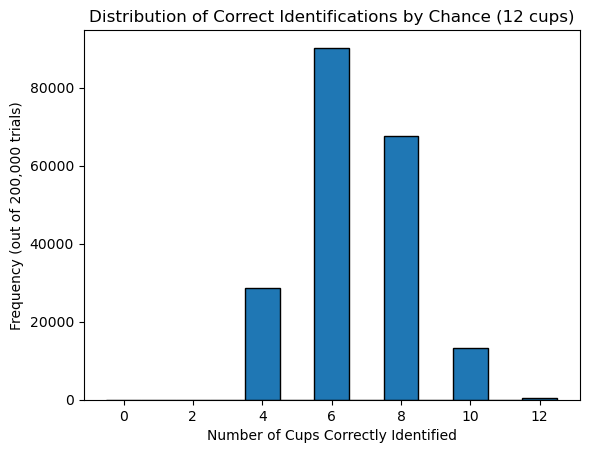

In [5]:
## Simulation (NumPy)

## verifying this probability and visualizing the distribution of correct identifications:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_trials = 200_000
n_cups = 12
n_milk_first = 4

# True arrangement: 1 = milk-first, 0 = tea-first
true_labels = np.array([1]*n_milk_first + [0]*(n_cups - n_milk_first))

# Store number of correct identifications
correct_counts = []

for _ in range(n_trials):
    guess = np.random.permutation(true_labels)
    correct = np.sum(guess == true_labels)
    correct_counts.append(correct)

# Estimating the probability of perfect success
p_perfect = np.mean(np.array(correct_counts) == n_cups)
print(f"Estimated probability of perfect identification by chance: {p_perfect:.6f}")

# Plot histogram
plt.hist(correct_counts, bins=np.arange(0, n_cups+2)-0.5, edgecolor='black')
plt.title("Distribution of Correct Identifications by Chance (12 cups)")
plt.xlabel("Number of Cups Correctly Identified")
plt.ylabel("Frequency (out of 200,000 trials)")
plt.show()

## 📚 References for this piece of code

- **Fisher, R. A. (1935).** *The Design of Experiments.* Oliver & Boyd, Edinburgh.  
  - Original publication introducing the *Lady Tasting Tea* experiment as a foundational example of hypothesis testing.

- **NumPy Documentation:** [NumPy random module](https://numpy.org/doc/stable/reference/random/index.html)  
  - Reference for random number generation and shuffling functions used in the simulation (`np.random.permutation`).

- **Matplotlib Documentation:** [Matplotlib Pyplot API](https://matplotlib.org/stable/api/pyplot_api.html)  
  - Documentation for creating visualizations (e.g., histograms of simulated results).

- **Scipy Stats Tutorial:** [Scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)  
  - Useful for understanding statistical distributions and hypothesis testing in Python.

- **DataCamp Tutorial:** [Hypothesis Testing in Python](https://www.datacamp.com/tutorial/hypothesis-testing-python)  
  - Practical guide on performing hypothesis tests and simulations with Python.

